In [1]:
import pandas as pd
birddata=pd.read_csv('bird_tracking.csv')

# First, use `groupby` to group up the data.
grouped_birds = birddata.groupby("bird_name")

# Now operations are performed on each group.
mean_speeds = grouped_birds.speed_2d.mean()

# The `head` method prints the first 5 lines of each bird.
grouped_birds.head()

# Find the mean `altitude` for each bird.
# Assign this to `mean_altitudes`.
mean_altitudes = grouped_birds.altitude.mean()

In [2]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date

# Check the head of the column.
birddata.date.head()

grouped_bydates = birddata.groupby('date')
mean_altitudes_perday = grouped_bydates.altitude.mean()

In [3]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,date
0,71,2013-08-15 00:18:08,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15
1,68,2013-08-15 00:48:07,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15
2,68,2013-08-15 01:17:58,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15
3,73,2013-08-15 01:47:51,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15
4,69,2013-08-15 02:17:42,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15


In [5]:
list(grouped_bydates)

[(datetime.date(2013, 8, 15),
         altitude           date_time  device_info_serial   direction  \
  0            71 2013-08-15 00:18:08                 851 -150.469753   
  1            68 2013-08-15 00:48:07                 851 -136.151141   
  2            68 2013-08-15 01:17:58                 851  160.797477   
  3            73 2013-08-15 01:47:51                 851   32.769360   
  4            69 2013-08-15 02:17:42                 851   45.191230   
  5            54 2013-08-15 02:47:38                 851  -46.344478   
  6            57 2013-08-15 03:02:33                 851  -56.369922   
  7            65 2013-08-15 03:17:27                 851  -79.170227   
  8            59 2013-08-15 03:32:35                 851  -57.682428   
  9           107 2013-08-15 03:47:48                 851  119.604739   
  10           61 2013-08-15 04:03:39                 851 -119.371360   
  11           56 2013-08-15 04:18:40                 851 -130.033119   
  12           57 201

In [6]:
mean_altitudes_perday

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
2013-08-20    184.461224
2013-08-21    171.546185
2013-08-22    114.172691
2013-08-23    144.716049
2013-08-24    101.446721
2013-08-25     93.162602
2013-08-26     75.995951
2013-08-27     84.591093
2013-08-28    111.210526
2013-08-29    177.421488
2013-08-30     92.520161
2013-08-31    160.975904
2013-09-01     84.753086
2013-09-02     88.128514
2013-09-03     93.975709
2013-09-04     90.717213
2013-09-05     87.264000
2013-09-06     89.020492
2013-09-07    103.412955
2013-09-08     76.566265
2013-09-09     81.483471
2013-09-10     90.618852
2013-09-11     77.222672
2013-09-12     75.646091
2013-09-13     66.615079
                 ...    
2014-04-01    115.797571
2014-04-02     13.589431
2014-04-03     26.772727
2014-04-04    101.441667
2014-04-05     96.995536
2014-04-06     13.426540
2014-04-07     27.105000
2014-04-08      9.597087
2014-04-09     22.84

In [7]:
grouped_birdday = birddata.groupby(['bird_name','date'])
mean_altitudes_perday = grouped_birdday.altitude.mean()

# look at the head of `mean_altitudes_perday`.
mean_altitudes_perday.head()

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

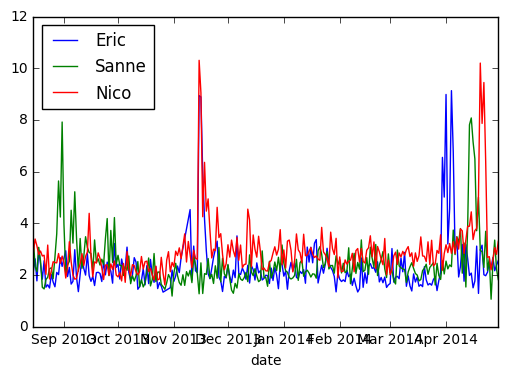

In [12]:
import matplotlib.pyplot as plt

mean_speed_perday = grouped_birdday.speed_2d.mean()

eric_daily_speed  = mean_speed_perday.Eric
sanne_daily_speed = mean_speed_perday.Sanne
nico_daily_speed  = mean_speed_perday.Nico

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()